In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nn-assign1-2ddata/train3.data
/kaggle/input/nn-assign1-2ddata/train2.data
/kaggle/input/nn-assign1-2ddata/test.data
/kaggle/input/nn-assign1-2ddata/train1.data


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Task 1

In [9]:
ds_train=pd.read_csv('/kaggle/input/nn-assign1-2ddata/test.data')

In [10]:
ds_train

,0.29166,0.83188,1
0,0.93377,0.203970,1
1,0.32986,-0.492880,0
2,0.74076,0.746900,1
3,-0.98015,0.026801,0
4,-0.72598,0.465300,0
...,...,...,...
94,-0.13625,0.448120,1
95,0.26853,-0.436730,0
96,0.60605,-0.476360,1
97,-0.83224,0.416940,0


In [11]:
ds_train.shape

(99, 3)

In [12]:
x_train1=ds_train.iloc[:,0:-1].values

In [13]:
y_train1=ds_train.iloc[:,-1].values

In [18]:
from sklearn.svm import SVC
classifer=SVC(kernel='poly')
classifer.fit(x_train1, y_train1)

SVC(kernel='poly')

In [20]:
ds_test=pd.read_csv('/kaggle/input/nn-assign1-2ddata/test.data')
x_test=ds_test.iloc[:,0:-1].values
y_test=ds_test.iloc[:,-1].values

In [22]:
y_pred=classifer.predict(x_test)

In [23]:
y_pred

array([1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1])

In [26]:
from sklearn.metrics import accuracy_score,confusion_matrix;
ac=accuracy_score(y_test,y_pred);
cm=confusion_matrix(y_test,y_pred);
ac

0.898989898989899

In [27]:
cm

array([[35, 10],
       [ 0, 54]])

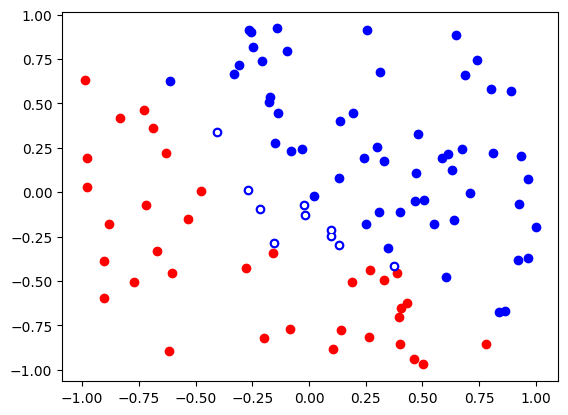

In [29]:
plt.scatter(x_test[y_pred==0,0], x_test[y_pred==0,1], color='red')
plt.scatter(x_test[y_pred==1,0], x_test[y_pred==1,1], color='blue')
plt.scatter(x_test[y_pred!=y_test,0], x_test[y_pred!=y_test,1], s=8, color="white")
plt.show()

# Task 2

In [30]:
ds_train2=pd.read_csv('../input/nn-assign1-2ddata/train2.data');
x_train2=ds_train2.iloc[:,0:-1].values;
y_train2=ds_train2.iloc[:,-1].values;

from sklearn.neighbors import KNeighborsClassifier;
classifier=KNeighborsClassifier(n_neighbors=5);
classifier.fit(x_train2,y_train2);

y_pred2=classifier.predict(x_test);
y_pred2

array([1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1])

In [31]:
ac2=accuracy_score(y_pred2,y_test);
ac2

0.9595959595959596

In [32]:
cm2=confusion_matrix(y_pred2,y_test);
cm2

array([[44,  3],
       [ 1, 51]])

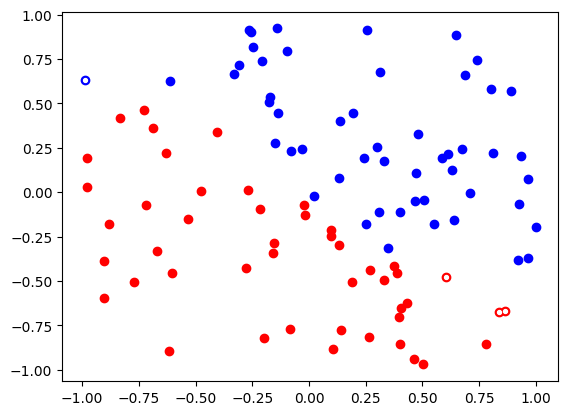

In [33]:
plt.scatter(x_test[y_pred2==0,0],x_test[y_pred2==0,1],color='red');
plt.scatter(x_test[y_pred2==1,0],x_test[y_pred2==1,1],color='blue');
plt.scatter(x_test[y_pred2!=y_test,0],x_test[y_pred2!=y_test,1],s=8,color='white');
plt.show();

# Task 3

In [34]:
ds_train3=pd.read_csv('../input/nn-assign1-2ddata/train3.data');
x_train3=ds_train3.iloc[:,0:-1].values;
y_train3=ds_train3.iloc[:,-1].values;

ds_combine=np.concatenate( (x_train3,x_test),0 );
ds_combine

from sklearn.decomposition import PCA;
pca=PCA(n_components=1);
ds_reduced=pca.fit(ds_combine)

ds_reduced=pca.transform(ds_combine);
ds_reduced

array([[ 0.51981674],
       [-0.09843204],
       [-0.01921158],
       [-0.68643757],
       [-0.61187662],
       [ 0.22865798],
       [ 1.17601471],
       [-0.48161798],
       [ 0.29809894],
       [-0.35553462],
       [-0.5455648 ],
       [-0.46658188],
       [-0.20973167],
       [ 0.6503107 ],
       [ 0.31255162],
       [-0.4831179 ],
       [-1.02781105],
       [ 0.33175274],
       [-0.99207859],
       [ 0.83193206],
       [ 0.20270997],
       [-0.19514635],
       [ 0.60494948],
       [ 0.96066721],
       [ 1.00301434],
       [ 1.02560211],
       [ 0.12244282],
       [ 0.45629104],
       [ 0.63816129],
       [ 0.75166911],
       [-0.25492212],
       [ 0.04499973],
       [-0.34576193],
       [ 0.32676617],
       [ 0.16600323],
       [-0.358132  ],
       [-0.14320146],
       [ 0.58514152],
       [ 0.11060249],
       [-0.3914625 ],
       [ 0.7425379 ],
       [ 0.01966497],
       [ 0.40876607],
       [-0.81260265],
       [-0.15001863],
       [-0